In [3]:
try:
    if pgl is not None:
        pgl.close()
        pgl = None
        print("PGL Close")
except NameError:
    print("No PGL is open")

No PGL is open


In [4]:
%load_ext autoreload
%autoreload 2
#import pgl
from pgl import pgl as pglLibrary
from pgl import screen as pglScreen
from pgl import task as pglTask
from pgl import pglProPixx
from pgl import pglDataPixx
from pgl import pglTrackPixx3
from pgl import pglEyelink
from pgl import pglKeyboard
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt
pgl = pglLibrary()
print(sys.version)

(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 15.6
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 3 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display)
(pglBase) Verbosity level set to 1
(pglBase) Main library instance created
3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:35:20) [Clang 16.0.6 ]


In [5]:
pgl = pglLibrary()
pgl.open(0,880,600)
#pgl.open()
pgl.visualAngle(57,40,30)
#datapixx = pglDataPixx()
#pgl.devicesAdd(datapixx)
keyboardDevice = pglKeyboard()
pgl.devicesAdd(keyboardDevice)

(pgl:checkOS) Running on MacBook Pro (MacBookPro18,3) with macOS version: 15.6
(pgl:checkOS) Apple M1 Pro Cores: 8 (6 performance and 2 efficiency) Memory: 32 GB
(pgl:checkOS) GPU: Apple M1 Pro (Built-In) 14 cores, Metal 3 support
(pgl:checkOS)   Color LCD [Main Display]: 3024 x 1964 Retina (Built-in Liquid Retina XDR Display)
(pglBase) Verbosity level set to 1
(pglBase) Main library instance created
(pglBase) Main library closed
(pglBase:open) Starting mglMetal application: /Users/justin/Library/Developer/Xcode/DerivedData/Build/Products/Debug/mglMetal.app
(pglBase:open) Using socket with address: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.nsAwVzf9Vs
(pgl:_pglComm) .Connected to: /Users/justin/Library/Containers/gru.mglMetal/Data/pglMetal.socket.nsAwVzf9Vs
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pglKeyboard) Keyboard listener initialized.
(pglDevices) Added device: pglKeyboard


In [14]:
#from pgl import pglEyelink
from pgl import pglEyelinkCustomDisplay
#eyelink = pglEyelink(pgl)
#customDisplay = pglEyelinkCustomDisplay(pgl,eyelink)

customDisplay = pglEyelinkCustomDisplay(pgl)

customDisplay.clear_cal_display()
customDisplay.draw_line(00,0,500,500,0)
customDisplay.draw_lozenge(100,200,100,300,0)
customDisplay.draw_cal_target(300,300)
#customDisplay.get_input_key()
#pgl.flush()

(pglEyelink) Calibration target at (300,300)


In [ ]:
eyelink = pglEyelink(pgl)

In [ ]:
pgl.devicesPoll()
eyelink.calibrate()
#eyelink.close()

In [ ]:
eyelink.close()

In [ ]:
from pgl import pglKeyboard
keyboardDevice = pglKeyboard()
#keyboardDevice.stopListener()

In [3]:
#pgl.dots([1,3,4],[2,5,8],color=[[1,0,0],[0,1,0],[0,0,1]])
#color=[[1,0,0],[0,1,0],[0,0,1],[1,0,0]]
#rdk = pglRandomDotStimulus(pgl,width=10, height=10)
pgl.commandRecord()
rdk = pgl.randomDots(width=10, height=10, noiseType='movshon')
print(rdk)
for i in range(60*10):
    rdk.display(direction=181, coherence=0.4, speed=7.0)
    pgl.flush()
#pgl.flush()
pgl.commandRecordStop()
pgl.commandList()


<pglStimulusRandomDot: 1000 dots, size=0.1, shape=1, aperture=elliptical>
(pglCommandReplayer) Recorded 1200 pgl commands.
Command 0: mglDots (Value: 1005, Data length: 3)
Command 1: mglFlush (Value: 1001, Data length: 1)
Command 2: mglDots (Value: 1005, Data length: 3)
Command 3: mglFlush (Value: 1001, Data length: 1)
Command 4: mglDots (Value: 1005, Data length: 3)
Command 5: mglFlush (Value: 1001, Data length: 1)
Command 6: mglDots (Value: 1005, Data length: 3)
Command 7: mglFlush (Value: 1001, Data length: 1)
Command 8: mglDots (Value: 1005, Data length: 3)
Command 9: mglFlush (Value: 1001, Data length: 1)
Command 10: mglDots (Value: 1005, Data length: 3)
Command 11: mglFlush (Value: 1001, Data length: 1)
Command 12: mglDots (Value: 1005, Data length: 3)
Command 13: mglFlush (Value: 1001, Data length: 1)
Command 14: mglDots (Value: 1005, Data length: 3)
Command 15: mglFlush (Value: 1001, Data length: 1)
Command 16: mglDots (Value: 1005, Data length: 3)
Command 17: mglFlush (Value: 

In [4]:
pgl.commandReplay()

(pglImage:setRenderTarget) Setting render target to image 1 (880x600)
(600, 880, 4)
(pglImage:setRenderTarget) Resetting render target to screen.
(pglImage:imageDelete) Deleting image 1 (880x600)
(pglImage:imageDelete) Deleting image 1 (880x600)


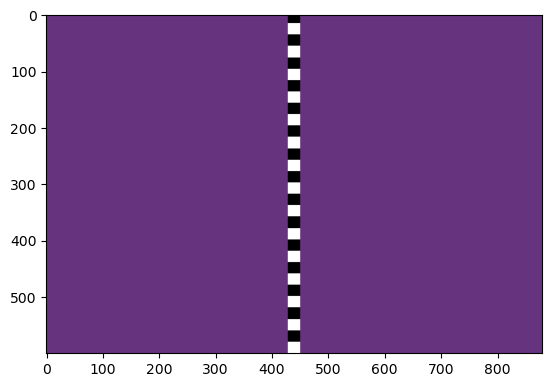

In [5]:
#pgl.verbose=1
pgl.frameGrabInit()
checkerboard = pgl.checkerboard(width=1)
checkerboard.display()
pgl.flush()

x = pgl.frameGrab()
print(x.shape)
plt.imshow(x[:,:,:])
pgl.frameGrabEnd()
#print(x[:,:,3])

In [6]:
#checkerboard.display(stimulusPhase = 0)
#pgl.flush()
#checkerboard.temporalSquareWave = True
pgl.commandRecord()
checkerboard = pgl.checkerboard(x=-5,checkWidth=1, checkHeight=1,width=1,temporalFrequency=1)
for i in range(10*60): 
    checkerboard.display(stimulusPhase=0.5)
    pgl.flush()
pgl.commandRecordStop()
pgl.commandList()

(pglCommandReplayer) Recorded 2400 pgl commands.
Command 0: mglDots (Value: 1005, Data length: 3)
Command 1: mglFlush (Value: 1001, Data length: 1)
Command 2: mglDots (Value: 1005, Data length: 3)
Command 3: mglFlush (Value: 1001, Data length: 1)
Command 4: mglDots (Value: 1005, Data length: 3)
Command 5: mglFlush (Value: 1001, Data length: 1)
Command 6: mglDots (Value: 1005, Data length: 3)
Command 7: mglFlush (Value: 1001, Data length: 1)
Command 8: mglDots (Value: 1005, Data length: 3)
Command 9: mglFlush (Value: 1001, Data length: 1)
Command 10: mglDots (Value: 1005, Data length: 3)
Command 11: mglFlush (Value: 1001, Data length: 1)
Command 12: mglDots (Value: 1005, Data length: 3)
Command 13: mglFlush (Value: 1001, Data length: 1)
Command 14: mglDots (Value: 1005, Data length: 3)
Command 15: mglFlush (Value: 1001, Data length: 1)
Command 16: mglDots (Value: 1005, Data length: 3)
Command 17: mglFlush (Value: 1001, Data length: 1)
Command 18: mglDots (Value: 1005, Data length: 3)
Co

In [7]:
device = pglTrackPixx3(pgl)
#datapixx.getError()
device.dp.TPxSetLEDIntensity(8)
#print(device.dp.TPxGetLEDIntensity())
device.calibrateEyeImage()
#device.getCameraImage()
#Image.fromarray(device.getCameraImage()).show()

(pglTrackPixx3) pypixxlib is not installed. Please install it to use TrackPixx3.


AttributeError: 'pglTrackPixx3' object has no attribute 'dp'

In [ ]:

#from pypixxlib.propixx import PROPixx
#pgl.verbose=1
#projector = pglProPixx()
#datapixx = pglDataPixx()

for i in range(1000):
    events = pgl.devicesPoll()
    #events = datapixx.poll()
    if events is not None:
        for event in events:
            print(event)
    pgl.waitSecs(0.1)
#datapixx.setupDigitalOutput()
#datapixx.test()
#for i in range(5):
#    print(f"Polling DataPixx: {i}")
    #datapixx.poll()
    #pgl.waitSecs(1)


#device.setRearProjection(True)
#from pypixxlib.propixx import PROPixx
#propixx = PROPixx()
#propixx.getDlpSequencerProgram()
#projector.status()
#print(device)
#from pgl.pglDevice import pglDevice, pglProPixx
#huh = pglDevice(pgl,'huh')
#duh = pglProPixx(pgl)

In [9]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Load Helvetica (on macOS)
font_path = "/System/Library/Fonts/Helvetica.ttc"
font_size = 40
font = ImageFont.truetype(font_path, font_size)

# The text to render
text = "Hello World"
padding = 10  # Add some padding around text

# Create a dummy image to measure text size
dummy_img = Image.new("RGBA", (1, 1))
draw = ImageDraw.Draw(dummy_img)

# Get bounding box of the text
bbox = draw.textbbox((0, 0), text, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]

# Create an image with transparent background
img = Image.new("RGBA", (text_width + 2 * padding, text_height + 2 * padding), (0, 0, 0, 0))
draw = ImageDraw.Draw(img)

# Draw anti-aliased white text
draw.text((padding, padding), text, font=font, fill=(255, 255, 255, 255))

# Convert to NumPy array
bitmap = np.array(img)

# Debug: print shape and preview alpha channel
print("Bitmap shape:", bitmap.shape)
print("Alpha channel:")
print(bitmap[:, :, 3])



Bitmap shape: (50, 226, 4)
Alpha channel:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:

#pgl.text("hello world",line=1,fontName = "Futura",fontSize=30,color=(0,0,0,1))
#pgl.text("This is the next line",x=0,line=-2)
pgl.verbose=2
pgl.text("And the next line of text, that I want to draw",x=0,line=-2)
pgl.text("next line")
pgl.text("wow")

pgl.flush()

(pglBase) Verbosity level set to 2
(pgl:resolution:setVerbose) Verbose level set to 2
(pglImage:imageValidate) imageData values were scaled from [0, 255] to [0, 1].
(pgl:_pglComm) Sending command: mglCreateTexture (value: 5)
(pgl:_pglComm) Message sent: 5
(pgl:_pglComm) Message sent: 783
(pgl:_pglComm) Message sent: 51
(pglImage:imageCreate) Creating image 783x51
(pgl:_pglComm) Message sent: [0. 0. 0. ... 0. 0. 0.]
(pglImage:imageCreate) Created image 2 (1 total images)
(pglImage:_pglImageInstance) Created image instance with: 2 (783x51)
(pglImage:imageDisplay) Displaying image 2 at (0, -9.164233983716914) with size (35.04237511589489, 2.5332028898079284).
(pgl:_pglComm) Sending command: mglBltTexture (value: 1003)
(pgl:_pglComm) Message sent: 1003
(pgl:_pglComm) Message sent: 1
(pgl:_pglComm) Message sent: 2
(pgl:_pglComm) Message sent: 2
(pgl:_pglComm) Message sent: 6
(pgl:_pglComm) Message sent: [[ 17.521187   -7.8976326   0.          1.          0.       ]
 [-17.521187   -7.8976326

True

In [11]:
#pgl.line(0,0,1920,1080,(1,0,0),units="pix")
pgl.arc(0,0,innerRadius=0,outerRadius=10,color=(0,1,0,1))

#pgl.line(1920,0,0,1080,(0,0,1),units="pix")
pgl.flush()
#pgl.printCommandResults()

[ 0.          0.          0.          0.          1.          0.
  1.          0.         10.          0.         10.          0.
  3.14159265  0.1       ]
(pgl:_pglComm) Sending command: mglArcs (value: 1009)
(pgl:_pglComm) Message sent: 1009
(pgl:_pglComm) Message sent: 1
(pgl:_pglComm) Message sent: [ 0.         0.         0.         0.         1.         0.
  1.         0.        10.         0.        10.         0.
  3.1415927  0.1      ]
(pgl:_pglComm) Sending command: mglFlush (value: 1001)
(pgl:_pglComm) Message sent: 1001


True

In [ ]:
pgl = pglLibrary()
pgl.open(0,880, 600)
#pgl.open()
pgl.visualAngle(57,40,30)


In [12]:
#pgl.clearScreen((0.5, 0.5, 0.5))  # Clear the screen with a gray color
#pgl.verbose=1
pgl.clearScreen((0.5, 0.5, 0.5))  # Clear the screen with a gray color
grating = pgl.grating(spatialFrequency=0.1,phase=0, contrast=1,temporalFrequency=4.0,direction=-1)
#gabor = pgl.gabor(spatialFrequency=1,orientation=45,width=40,height=30,phase=0,contrast=0.8)
#gabor.print()


(pgl:clearScreen) Clearing screen with color (0.5, 0.5, 0.5)
(pgl:_pglComm) Sending command: mglSetClearColor (value: 1012)
(pgl:_pglComm) Message sent: 1012
(pgl:_pglComm) Message sent: [[0.5 0.5 0.5]]
(pgl:_pglComm) Sending command: mglGetWindowFrameInDisplay (value: 9)
(pgl:_pglComm) Message sent: 9
(pgl:getNumDisplaysAndDefault) Getting number of displays and default display
(pgl:getResolution) Getting resolution for screen 0
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pgl:_resolution:printDisplayModes) Available video modes for display 0
 0: 1920x1200 120Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 1: 1920x1200  60Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 2: 1920x1200  59Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 3: 1920x1200  50Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 4: 1920x1200  48Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 5: 1920x1200  47Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 6: 2048x1280 120Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB


(pglProfile) Cleared all profile data.
(pgl:_pglComm) Sending command: mglGetWindowFrameInDisplay (value: 9)
(pgl:_pglComm) Message sent: 9
(pgl:getNumDisplaysAndDefault) Getting number of displays and default display
(pgl:getResolution) Getting resolution for screen 0
(pglProfile) profileModeBufferSize set to 7200 frames (60.00 seconds)
(pglProfile) Will reallocate if this is exceeded, but you can change this with pgl.profileModeBufferSize = <new size>
(pgl:_pglComm) Sending command: mglSampleTimestamps (value: 23)
(pgl:_pglComm) Message sent: 23
(pgl:_resolution:getResolution) Display 0/1: 1512x982 120Hz 32bits
(pgl:_resolution:printDisplayModes) Available video modes for display 0
 0: 1920x1200 120Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 1: 1920x1200  60Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 2: 1920x1200  59Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 3: 1920x1200  50Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 4: 1920x1200  48Hz 32 bits	--------RRRRRRRRGGGGGGGGBBBBBBBB
 5

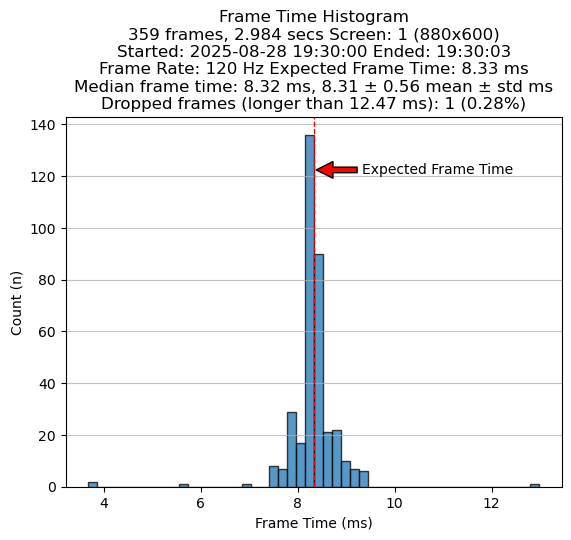

In [13]:

pgl.profileModeClearAll()
pgl.profileMode = 2
#pgl.batchStart()
for i in range(360):
    grating.display()
    pgl.flush()
pgl.profileMode = 0
#pgl.flush()
#pgl.waitSecs(1)
#pgl.batchRun()
#pgl.waitSecs(2)
#pgl.batchEnd()
#pgl.waitSecs(2)

pgl.profileModeDisplay()

In [14]:
#gabor.print()
gabor.display()
pgl.flush()



NameError: name 'gabor' is not defined

In [ ]:
pgl.profileModeClearAll()
#pgl.fullScreen(True)
_,_,frameRate,_ =pgl.getResolution()
print(frameRate)
pgl.profileMode = 2
#print(pgl.profileMode)
#print(pgl.profileModeBufferSize )
pgl.clearScreen([0,0,0])
pgl.flush()
for i in range(frameRate*1):
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    pgl.flush()
pgl.profileMode = 0
#pgl.fullScreen(False)
pgl.profileModeDisplay()


In [ ]:
_,_,frameRate,_ =pgl.getResolution()
pgl.profileModeClearAll()
pgl.batchStart()
for i in range(frameRate*5):
    #im.display()
    pgl.dots(np.random.uniform(-20,20),np.random.uniform(-15,15))
    #pgl.printCommandResults()
    #pgl.printCommandResults()


    pgl.flush()
    #pgl.printCommandResults()
#pgl.batchRun()
#pgl.batchEnd()

In [ ]:
pgl.batchRun()
pgl.batchEnd()
pgl.profileModeDisplay()

In [15]:
imData = Image.open('/Users/justin/proj/pgl/testimage.jpg')
#pgl.visualAngle(57,40,30)
pgl.imageDisplay(imData)
pgl.flush()

(pglImage:imageValidate) imageData values were scaled from [0, 255] to [0, 1].
(pgl:_pglComm) Sending command: mglCreateTexture (value: 5)
(pgl:_pglComm) Message sent: 5
(pgl:_pglComm) Message sent: 5616
(pgl:_pglComm) Message sent: 3744
(pglImage:imageCreate) Creating image 5616x3744
(pgl:_pglComm) Message sent: [0.11764706 0.11372549 0.09411765 ... 0.16470589 0.21176471 1.        ]
(pglImage:imageCreate) Created image 35 (31 total images)
(pglImage:_pglImageInstance) Created image instance with: 35 (5616x3744)
(pglImage:imageDisplay) Displaying image 35 at (0, 0) with size (251.33841462434958, 185.96689449884084).
(pgl:_pglComm) Sending command: mglBltTexture (value: 1003)
(pgl:_pglComm) Message sent: 1003
(pgl:_pglComm) Message sent: 1
(pgl:_pglComm) Message sent: 2
(pgl:_pglComm) Message sent: 2
(pgl:_pglComm) Message sent: 6
(pgl:_pglComm) Message sent: [[ 125.669205   92.983444    0.          1.          0.      ]
 [-125.669205   92.983444    0.          0.          0.      ]
 [-

True

Install pgl library

Instal screen and task

In [ ]:
#init screen
s = pglScreen();
s.helloworld();

# init task
t = pglTask();
t.helloworld();


In [ ]:
# start MATLAB
import matlab.engine
eng = matlab.engine.start_matlab()

# add mgl to path
eng.addpath(eng.genpath("/Users/justin/proj/mgl"),nargout=0)


In [ ]:
# mgl from python using mgl engine test
eng.eval("mglOpen;",nargout=0)
eng.eval("mglVisualAngleCoordinates(57,[16,24]);",nargout=0)
eng.eval("mglClearScreen([0.3 0.7 0.2]);",nargout=0)
eng.eval("mglTextDraw('Hello World!',[0 0]);",nargout=0)
eng.eval("mglFlush;",nargout=0)
eng.eval("mglWaitSecs(3);",nargout=0)
eng.eval("mglClose;",nargout=0)

